<a href="https://colab.research.google.com/github/Cepeda-R/Data-Science/blob/master/HeartDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LOAD DATA - REFRESH

Where did the dataset come from and what treatments did it undergo?
Originally, the dataset come from the CDC and is a major part of the Behavioral Risk Factor Surveillance System (BRFSS), which conducts annual telephone surveys to gather data on the health status of U.S. residents. As the CDC describes: "Established in 1984 with 15 states, BRFSS now collects data in all 50 states as well as the District of Columbia and three U.S. territories. BRFSS completes more than 400,000 adult interviews each year, making it the largest continuously conducted health survey system in the world.". The most recent dataset (as of February 15, 2022) includes data from 2020. It consists of 401,958 rows and 279 columns. The vast majority of columns are questions asked to respondents about their health status, such as "Do you have serious difficulty walking or climbing stairs?" or "Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes]". In this dataset, I noticed many different factors (questions) that directly or indirectly influence heart disease, so I decided to select the most relevant variables from it and do some cleaning so that it would be usable for machine learning projects.

What can you do with this dataset?
As described above, the original dataset of nearly 300 variables was reduced to just about 20 variables. In addition to classical EDA, this dataset can be used to apply a range of machine learning methods, most notably classifier models (logistic regression, SVM, random forest, etc.). You should treat the variable "HeartDisease" as a binary ("Yes" - respondent had heart disease; "No" - respondent had no heart disease). But note that classes are not balanced, so the classic model application approach is not advisable. Fixing the weights/undersampling should yield significantly betters results. Based on the dataset, I constructed a logistic regression model and embedded it in an application you might be inspired by: https://heart-condition-checker.herokuapp.com/. Can you indicate which variables have a significant effect on the likelihood of heart disease?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime
from datetime import date
from pandas import datetime

%matplotlib inline
%config IPCompleter.greedy=True

#from scipy.stats import shapiro
#import statsmodels.api as sm 

import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


In [2]:
# Fetch a single <1MB file using the raw GitHub URL.
!curl --remote-name \
     -H 'Accept: application/vnd.github.v3.raw' \
     --location https://github.com/Cepeda-R/DataSets/blob/master/heart_2020_cleaned.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  120k    0  120k    0     0   384k      0 --:--:-- --:--:-- --:--:--  384k


In [3]:
#clone à base de dados do github
!git clone https://github.com/Cepeda-R/DataSets.git

Cloning into 'DataSets'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), done.


In [4]:
!ls #confirmar se o clone foi bem feito

DataSets  heart_2020_cleaned.csv  sample_data


In [5]:
df_heartDisease = pd.read_csv("/content/DataSets/heart_2020_cleaned.csv")
#para tirar partido do clone tem que se colocar content e o nome do repositório


In [6]:
df_heartDisease.tail(2)
#heardisease será a resposta para este projeto

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No
319794,No,46.56,No,No,No,0.0,0.0,No,Female,80 or older,Hispanic,No,Yes,Good,8.0,No,No,No


# EDA Exploratory and Data Analysis

In [7]:
!pip install sweetviz

     |████████████████████████████████| 15.1 MB 7.8 MB/s 


9% of Sample Data have Heart Disease Condition

                                             |          | [  0%]   00:00 -> (? left)


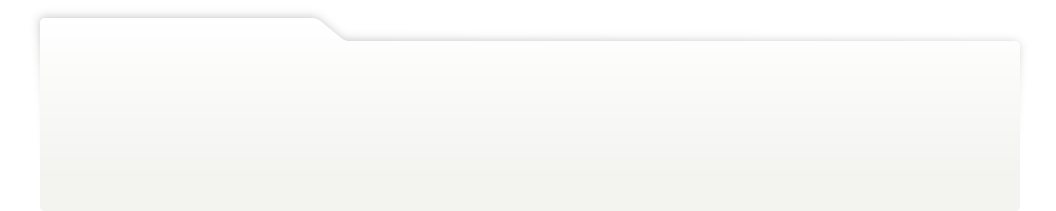
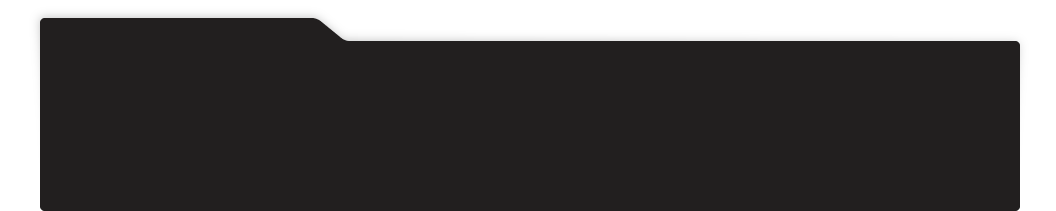
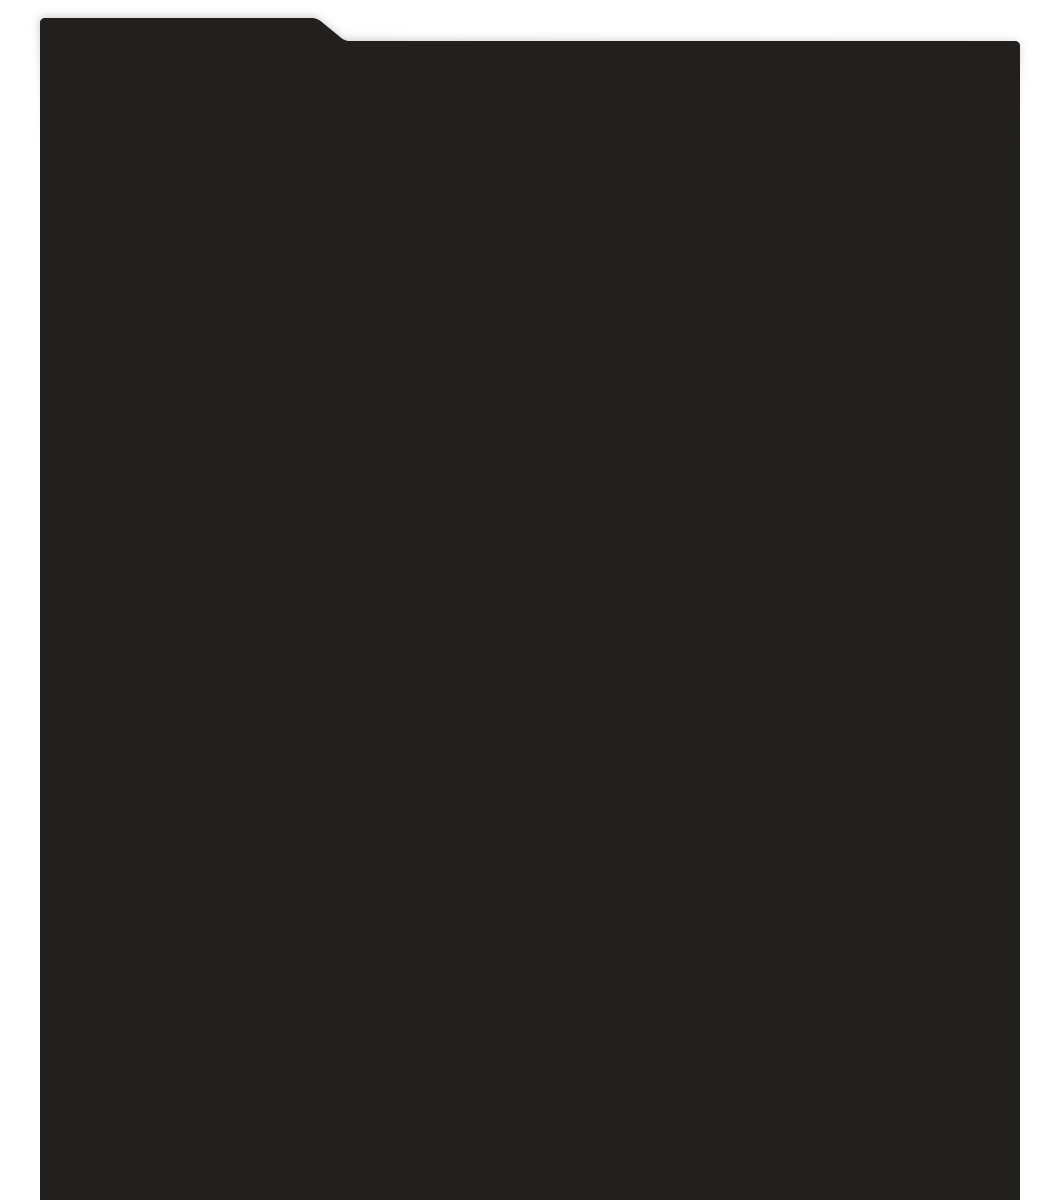
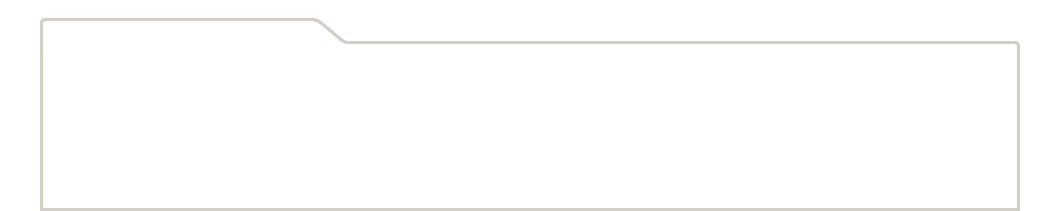
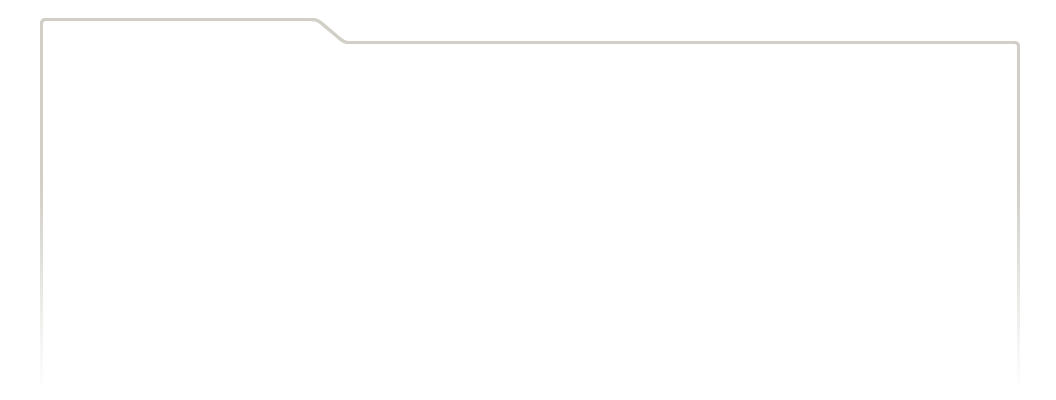
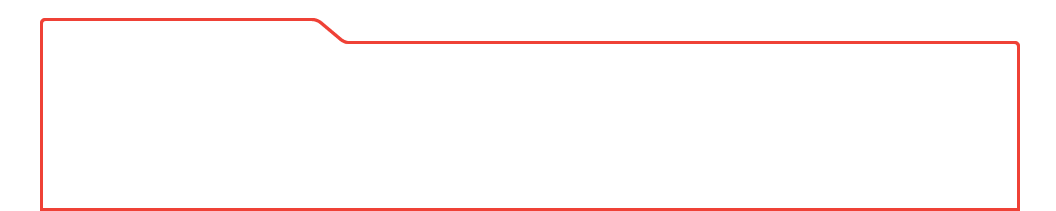
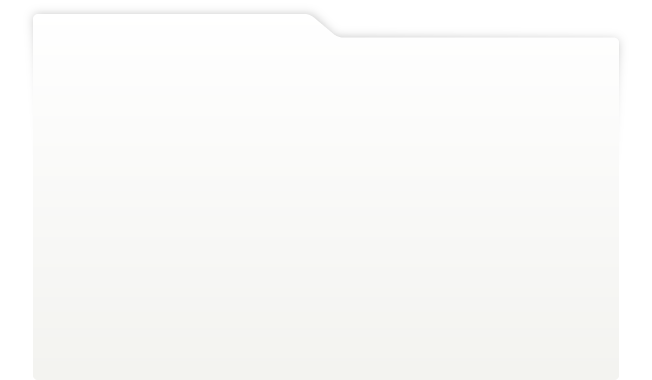
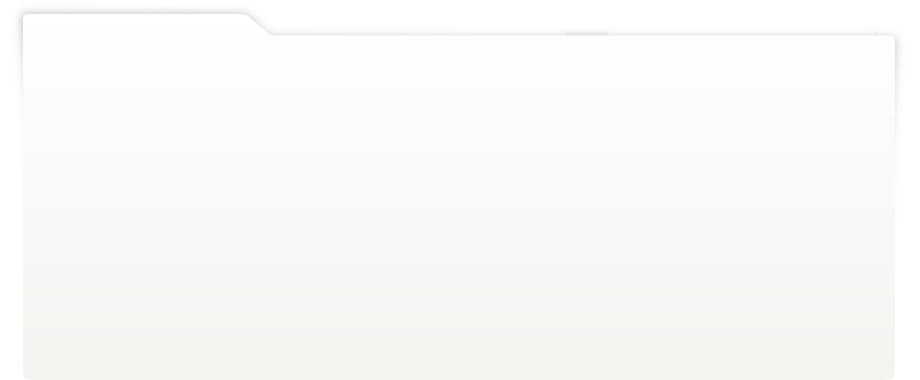
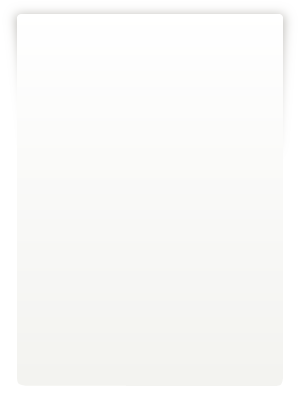
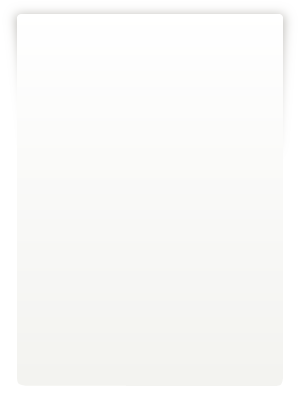
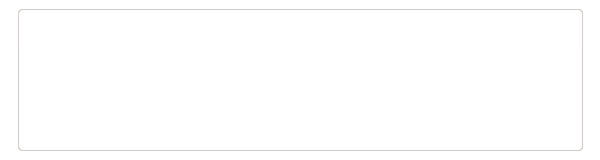
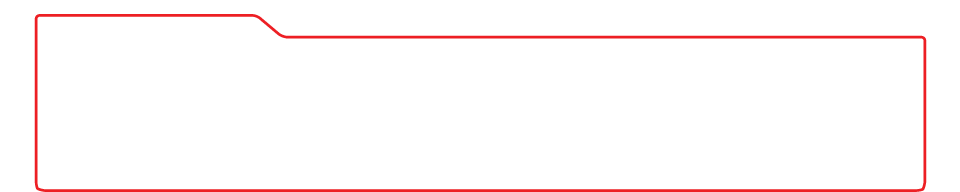
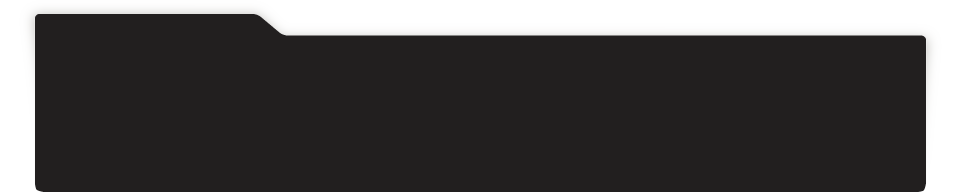
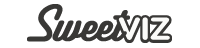
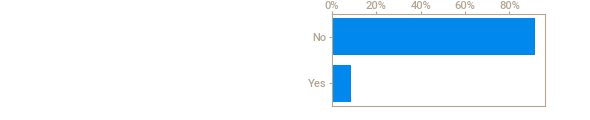
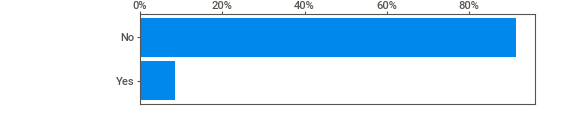
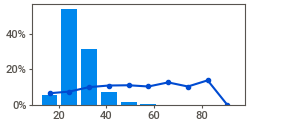
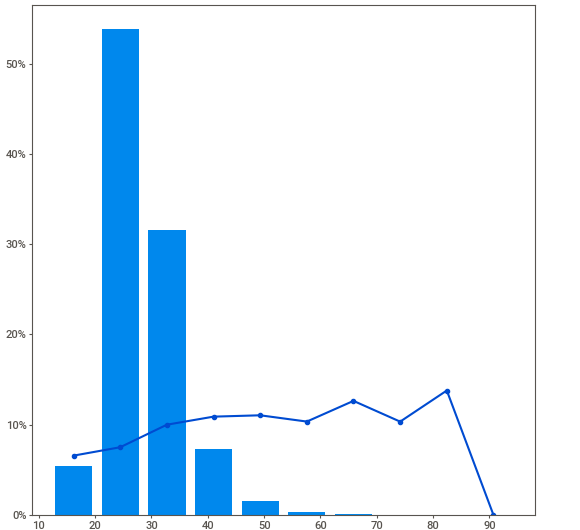
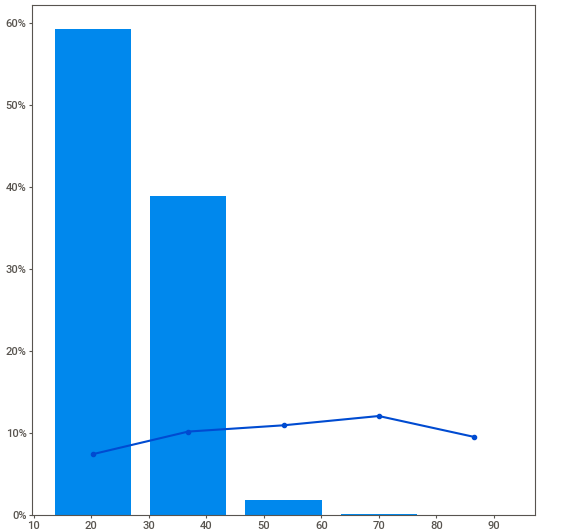
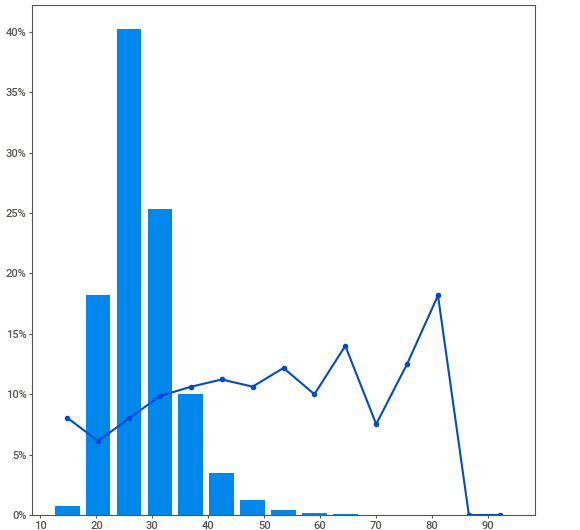
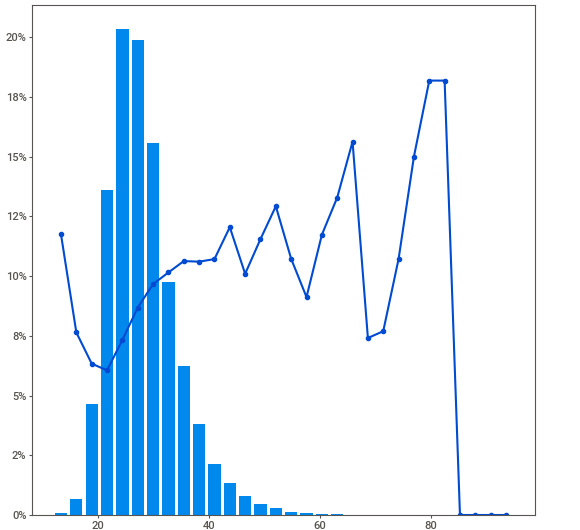
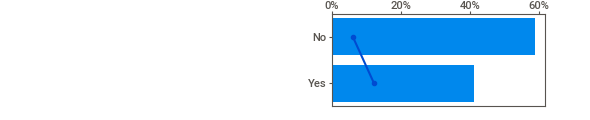
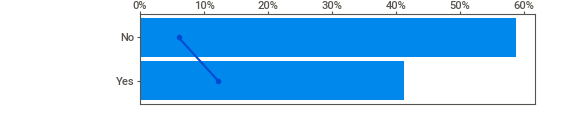
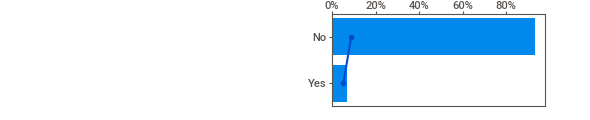
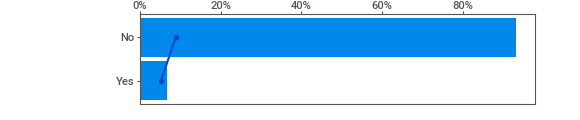
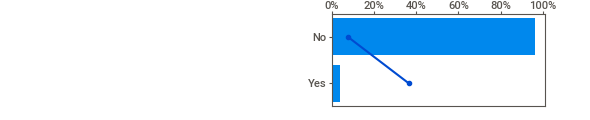
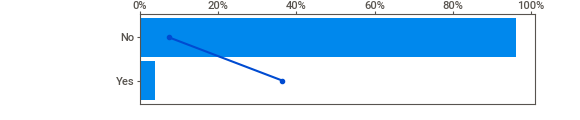
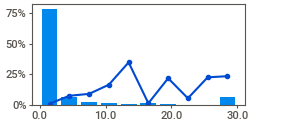
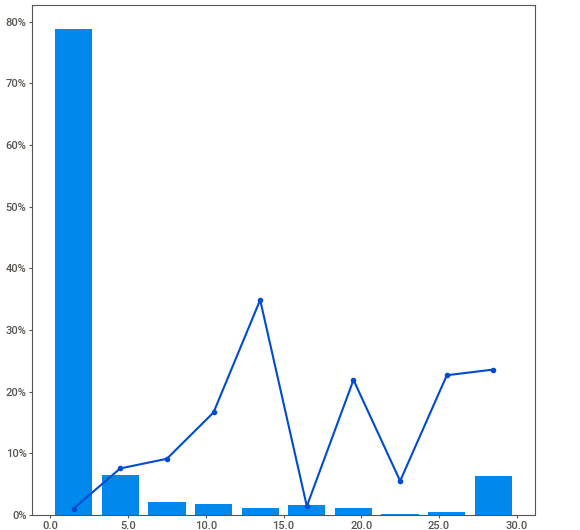
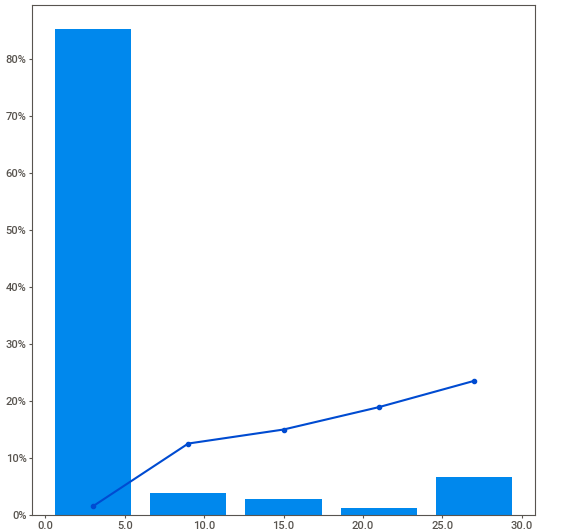
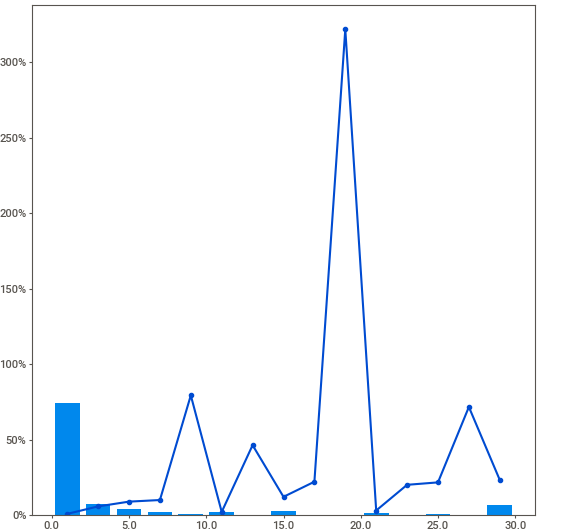
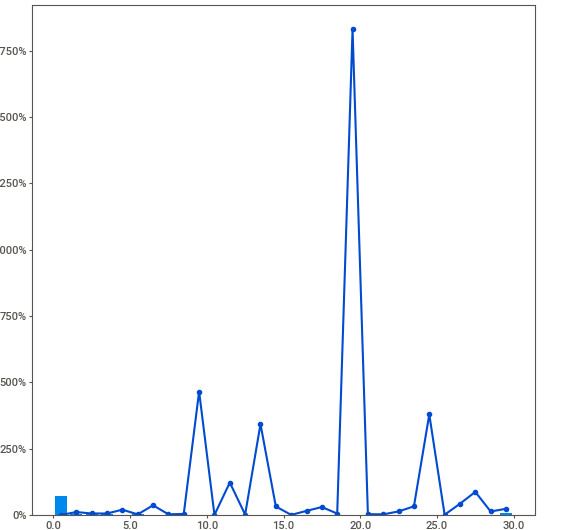
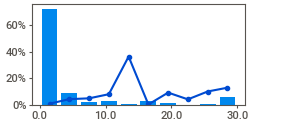
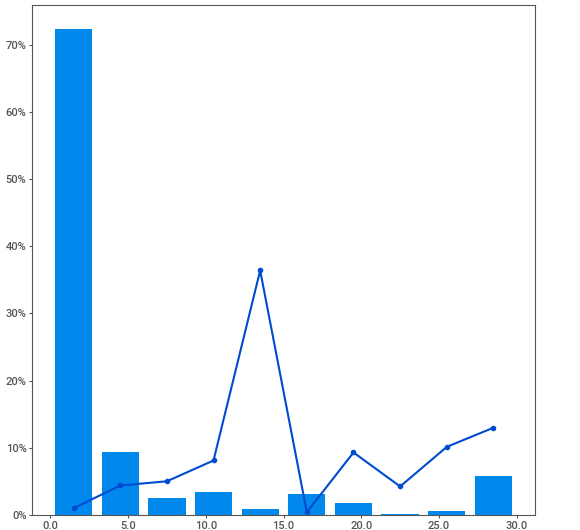
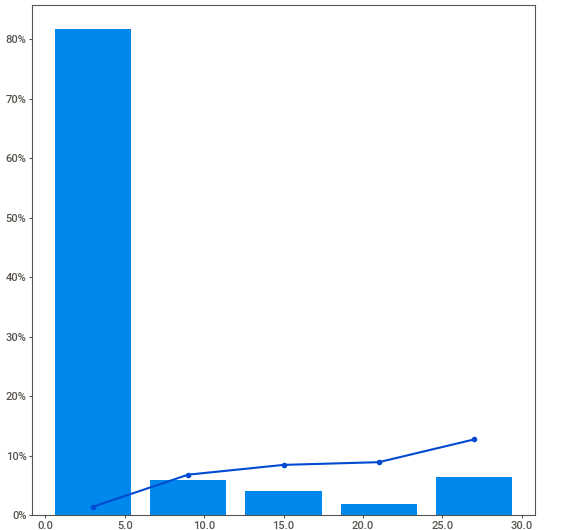
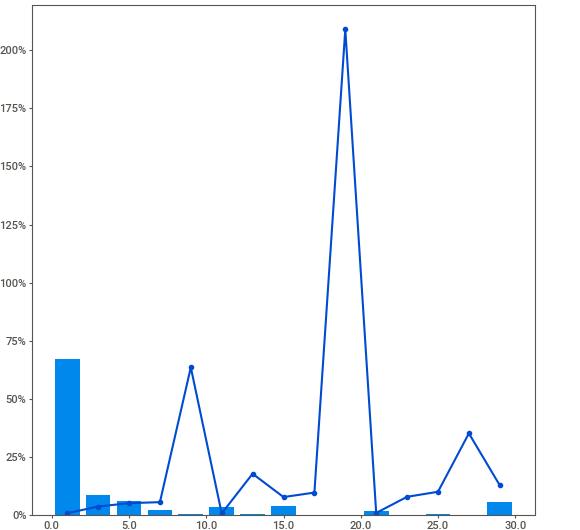
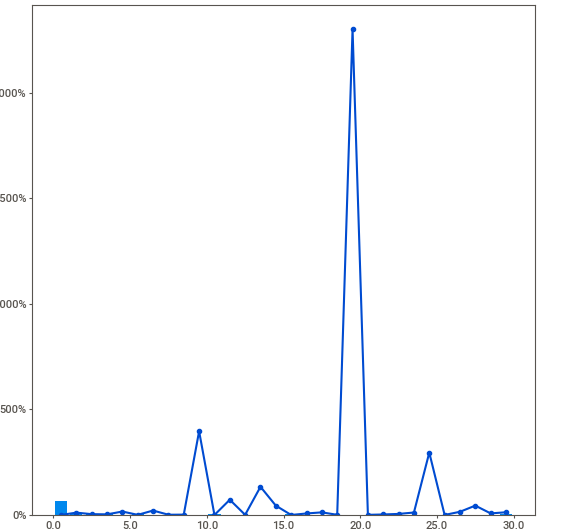
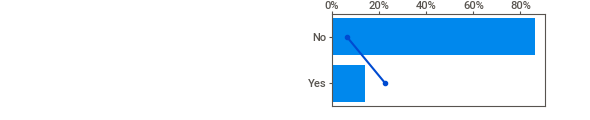
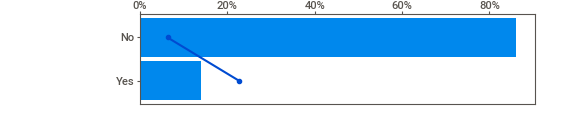
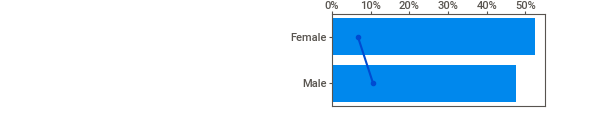
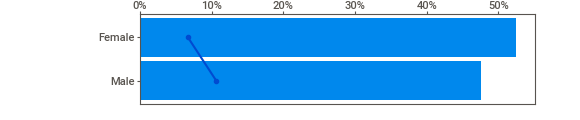
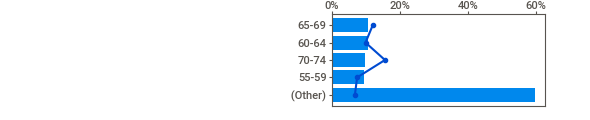
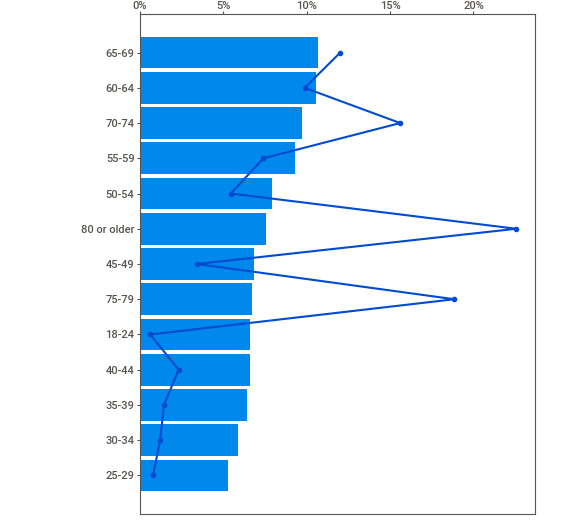
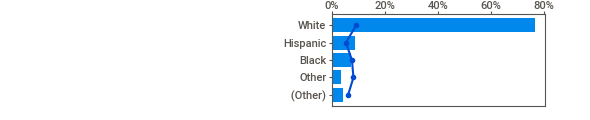
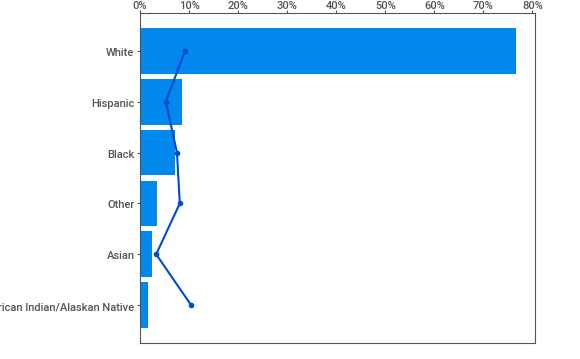
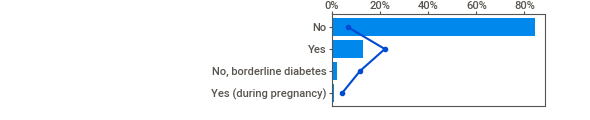
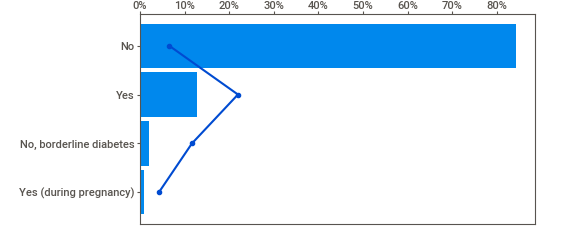
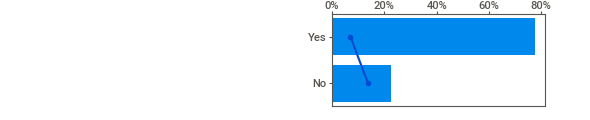
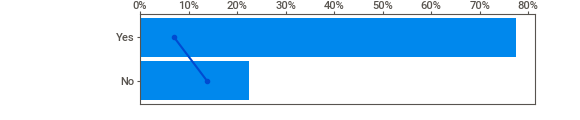
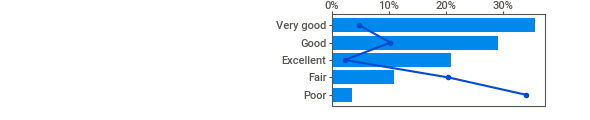
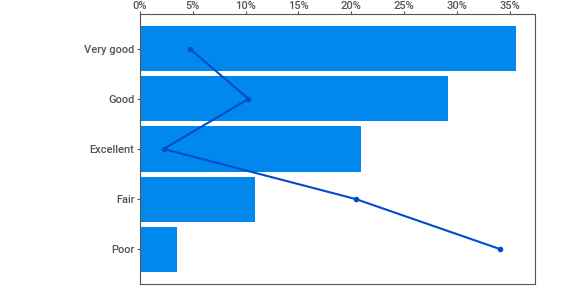
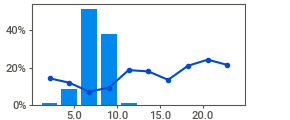
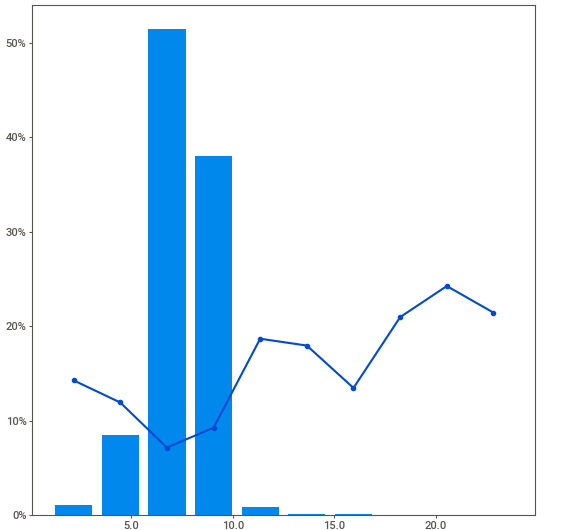
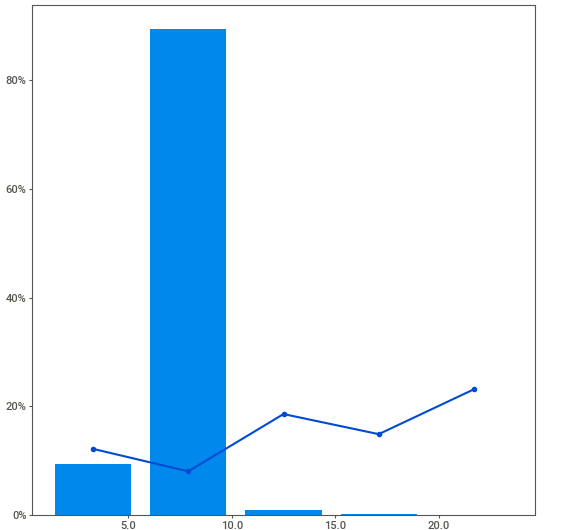
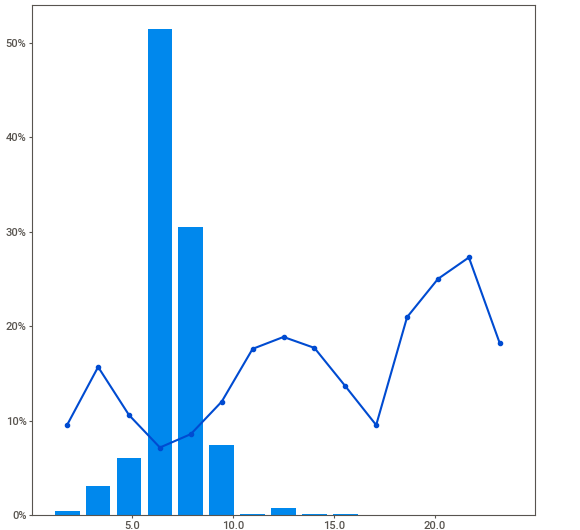
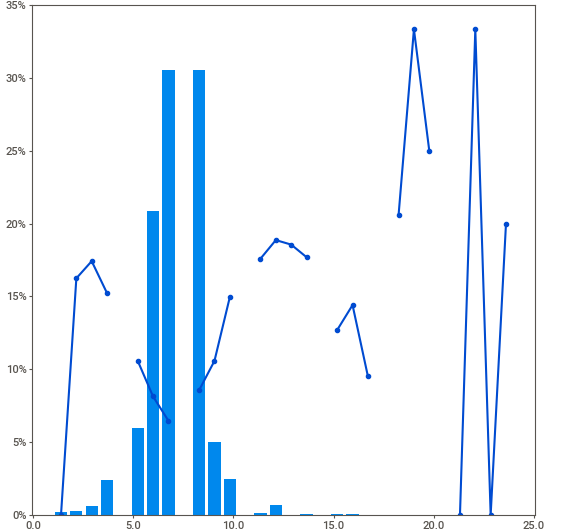
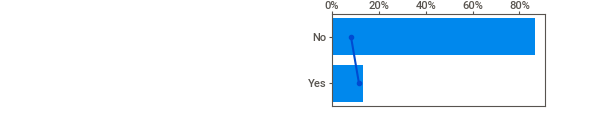
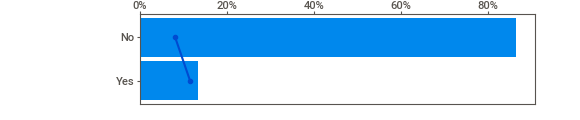
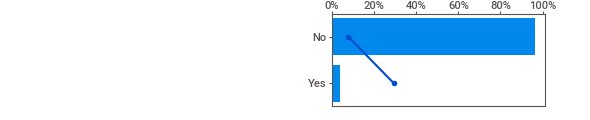
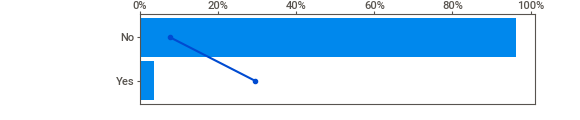
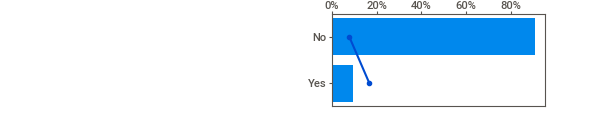
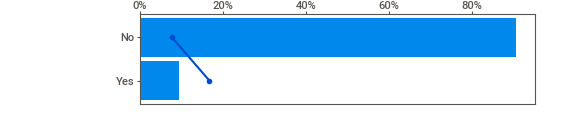
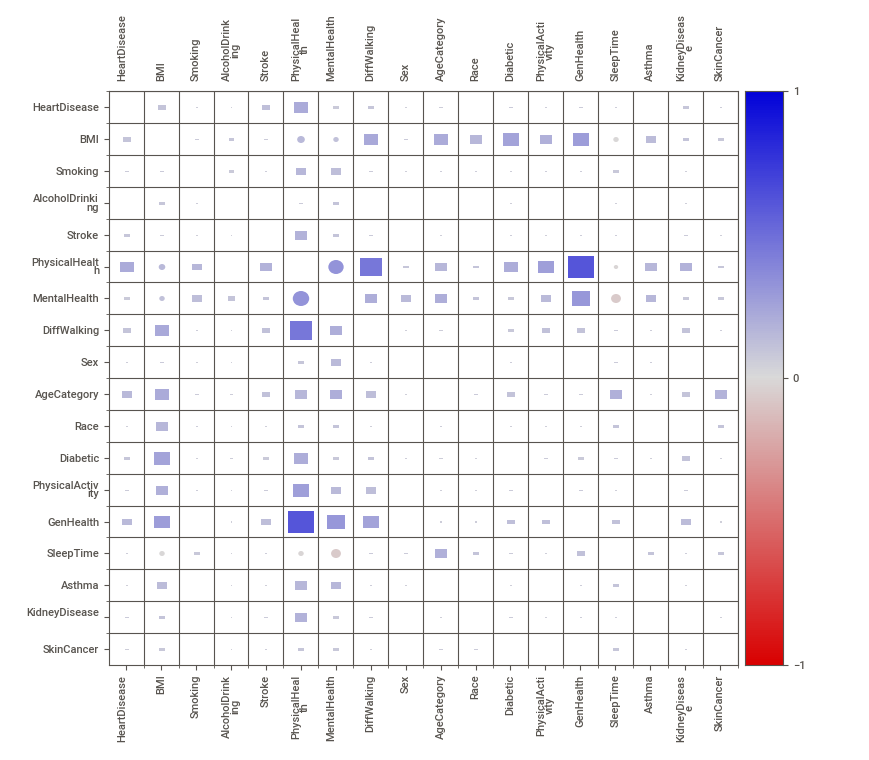
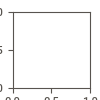

In [8]:
import sweetviz as sv

my_report = sv.analyze(df_heartDisease, target_feat='HeartDisease')
my_report.show_notebook() # Default arguments will generate to "SWEETVIZ_REPORT.html"

Sweetviz already provided descriptive statistics
alongside with correlation features
Sweetvzi tells us AgeCategory and GenHealth have
High relationship with HeartDisease
However Feature Selection will be made to validate
this information

a. 9% of sample dataset has heartdisease

b. BMI increase show positive impact of heartdisease

c. Stroke, KidneyDisease have a high impact of heartdisease, however keep in mind that could be lead to low sample size

d. Sex there is not significance diff between the two
e. SleepTime have values above 12 hours average. It is not common to sleep so many hours above this threshold. We have to consider as outliers (remove it)

f. Age - Disease has an increase with the age

g. GenHealth Poor have an high impact on disease

In [9]:
df_heartDisease.isna().sum()
#print(f'quantity of nulls overall{df_heartDisease.isna().sum()/len(df_heartDisease)}')
#df.dropna(inplace=True)

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

Doesn't have null values. Duplicates are related to people having the same conditions

In [10]:
df_heartDisease.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


Data validated with sweetviz

In [12]:
contigency_Age= pd.crosstab(df_heartDisease['HeartDisease'], df_heartDisease['AgeCategory'])
contigency_Smoking= pd.crosstab(df_heartDisease['HeartDisease'], df_heartDisease['Smoking'])
contigency_Alchool= pd.crosstab(df_heartDisease['HeartDisease'], df_heartDisease['AlcoholDrinking'])
contigency_Stroke= pd.crosstab(df_heartDisease['HeartDisease'], df_heartDisease['Stroke'])
contigency_DiffWalking= pd.crosstab(df_heartDisease['HeartDisease'], df_heartDisease['DiffWalking'])
contigency_Sex= pd.crosstab(df_heartDisease['HeartDisease'], df_heartDisease['Sex'])
contigency_Race= pd.crosstab(df_heartDisease['HeartDisease'], df_heartDisease['Race'])
contigency_Diabetic= pd.crosstab(df_heartDisease['HeartDisease'], df_heartDisease['Diabetic'])
contigency_GenHealth= pd.crosstab(df_heartDisease['HeartDisease'], df_heartDisease['GenHealth'])
contigency_Asthma= pd.crosstab(df_heartDisease['HeartDisease'], df_heartDisease['Asthma'])
contigency_KidneyDisease= pd.crosstab(df_heartDisease['HeartDisease'], df_heartDisease['KidneyDisease'])
contigency_SkinCancer= pd.crosstab(df_heartDisease['HeartDisease'], df_heartDisease['SkinCancer'])

In [13]:
from scipy.stats import chi2_contingency

Lets evaluate chisquare categorical data relationship

In [15]:
c, p, dof, expected = chi2_contingency(contigency_Age) 
print('Age', p)

Age 0.0


In [16]:
c, p, dof, expected= chi2_contingency(contigency_Smoking) 
print('Smoking', p)

Smoking 0.0


In [17]:
c, p, dof, expected= chi2_contingency(contigency_Alchool) 
print('Alchool', p)

Alchool 1.892352227090306e-73


In [18]:
c, p, dof, expected= chi2_contingency(contigency_Stroke) 
print('Stroke', p)

Stroke 0.0


In [19]:
c, p, dof, expected= chi2_contingency(contigency_DiffWalking) 
print('DiffWalking', p)

DiffWalking 0.0


In [20]:
c, p, dof, expected= chi2_contingency(contigency_Sex) 
print('Sex', p)

Sex 0.0


In [21]:
c, p, dof, expected= chi2_contingency(contigency_Race) 
print('Race', p)

Race 2.9886131565632597e-180


In [22]:
c, p, dof, expected= chi2_contingency(contigency_Diabetic) 
print('Diabetic', p)

Diabetic 0.0


In [23]:
c, p, dof, expected= chi2_contingency(contigency_GenHealth) 
print('GenHealth', p)

GenHealth 0.0


In [24]:
c, p, dof, expected= chi2_contingency(contigency_Asthma) 
print('Asthma', p)

Asthma 2.2386144306283177e-121


In [25]:
c, p, dof, expected= chi2_contingency(contigency_KidneyDisease) 
print('KidneyDisease', p)

KidneyDisease 0.0


In [26]:
c, p, dof, expected= chi2_contingency(contigency_SkinCancer) 
print('SkinCancer', p)

SkinCancer 0.0


Using P Value is not enough. A different approach must be made

In [27]:
df_heartDisease.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

In [29]:
from sklearn.preprocessing import OrdinalEncoder

In [30]:
enc = OrdinalEncoder()
df_heartDisease[["HeartDisease","Smoking", "AlcoholDrinking", "Stroke", "DiffWalking", "Race", "AgeCategory", "Sex", "Diabetic", "PhysicalActivity", "GenHealth", "Asthma", "KidneyDisease", "SkinCancer" ]] = enc.fit_transform(df_heartDisease[["HeartDisease","Smoking", "AlcoholDrinking", "Stroke", "DiffWalking", "Race", "AgeCategory", "Sex", "Diabetic", "PhysicalActivity", "GenHealth", "Asthma", "KidneyDisease", "SkinCancer" ]])

Must transform Categorical Data to Ordinal for feature selection analysis

In [32]:
X = df_heartDisease.iloc[:,1:17]  #independent columns
y = df_heartDisease['HeartDisease']    #target column i.e price range

In [28]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [147]:
bestfeatures = SelectKBest(score_func=chi2, k=16)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns_kbest,dfscores_kbest],axis=1)
featureScores.columns = ['Specs_Kbest','Score']  #naming the dataframe columns
print(featureScores.nlargest(16,'Score'))  #print 10 best featur

         Specs_Kbest          Score
4     PhysicalHealth  174751.529924
8        AgeCategory   33991.390453
10          Diabetic   15526.406399
3             Stroke   11922.577647
6        DiffWalking   11154.414931
15     KidneyDisease    6493.654143
5       MentalHealth    4243.691008
1            Smoking    2181.953023
0                BMI    1224.020726
7                Sex     823.195671
11  PhysicalActivity     718.810142
14            Asthma     475.647835
2    AlcoholDrinking     306.693270
9               Race     129.834374
12         GenHealth      41.496727
13         SleepTime       6.442351


In [148]:
Kbest_feature = pd.DataFrame(featureScores.nlargest(16,'Score')['Specs_Kbest'])

Astham AlcoholDrinking and Race doens't have a big impact as seen in ChiSquared univariate test

Test SleepTime & BMI to Target are continuous variables. Must use Anova to understand the impact

**O SelectKBest is optimal only for categorical variables. BMI is continuous variable influencing data!** A different algorithm must be use

In [34]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(df_heartDisease['HeartDisease'], df_heartDisease['BMI'])
print(fvalue, pvalue)

6300470.152144521 0.0


In [35]:
fvalue, pvalue = stats.f_oneway(df_heartDisease['SleepTime'], df_heartDisease['BMI'], df_heartDisease['HeartDisease'])
print(fvalue, pvalue)

4876148.310351412 0.0


In [36]:
fvalue, pvalue = stats.f_oneway(df_heartDisease['PhysicalHealth'],  df_heartDisease['HeartDisease'])
print(fvalue, pvalue)

54559.77199966619 0.0


In [37]:
fvalue, pvalue = stats.f_oneway(df_heartDisease['AgeCategory'],  df_heartDisease['HeartDisease'])
print(fvalue, pvalue)

1033768.517361814 0.0


In [38]:
fvalue, pvalue = stats.f_oneway(df_heartDisease['MentalHealth'],  df_heartDisease['HeartDisease'])
print(fvalue, pvalue)

73368.59536564087 0.0


ANOVA tests have p value bellow 0,05. That means float/continuous variables have as well impact. Another point to justify another aproach for feature selection

In [149]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
dfscores_extra = pd.DataFrame(model.feature_importances_)
dfcolumns_extra = pd.DataFrame(X.columns)
featureScores_extra = pd.concat([dfcolumns_extra,dfscores_extra],axis=1)
featureScores_extra.columns = ['Specs_ExtraTree','Score']  #naming the dataframe columns
#print(featureScores_extra.nlargest(16,'Score'))  #print 10 best features
ExtraTree_feature = pd.DataFrame(featureScores_extra.nlargest(16,'Score')['Specs_ExtraTree'])

In [200]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

rfe_selector = RFE(DecisionTreeClassifier(), n_features_to_select=16)
rfe_selector.fit(X, y)
dfscores_dtree = pd.DataFrame(rfe_selector.estimator_.feature_importances_)
dfcolumns_dtree = pd.DataFrame(X.columns)
featureScores_dtree = pd.concat([dfcolumns_dtree, dfscores_dtree], axis=1)
featureScores_dtree.columns = ['Specs_dtree','Score']
dtree_feature = pd.DataFrame(featureScores_dtree.nlargest(16,'Score')['Specs_dtree'])
#dfcolumns_RFE = pd.DataFrame(X.columns[rfe_selector.get_support()])
#dfcolumns_RFE.columns = ['Specs_DecisionTree']

In [172]:
#threshold=0.00000000006
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

sfm_selector = SelectFromModel(estimator=LogisticRegression(), threshold=0.00000000006)
sfm_selector.fit(X, y)
dfscores_sfma = pd.DataFrame(sfm_selector.estimator_.coef_)
dfscores_sfm = dfscores_sfma.transpose()
dfcolumns_sfm = pd.DataFrame(X.columns)
featureScores_sfm = pd.concat([dfcolumns_sfm, dfscores_sfm], axis=1)
featureScores_sfm.columns = ['Specs_sfm','Score']
sfm_feature = pd.DataFrame(featureScores_sfm.nlargest(16,'Score')['Specs_sfm'])

In [197]:
sfm_logistic_feature = sfm_feature.reset_index()
rfe_decisiontree_feature = dtree_feature.reset_index()
ExtraTree_Decision_feature = ExtraTree_feature.reset_index()
Chi_Kbest_feature = Kbest_feature.reset_index()
Chi_Kbest_feature.drop('index', axis=1, inplace=True)
ExtraTree_Decision_feature.drop('index', axis=1, inplace=True)
rfe_decisiontree_feature.drop('index', axis=1, inplace=True)
sfm_logistic_feature.drop('index', axis=1, inplace=True)

Using Logistic Regression gives features different from extra tree model/estimator, alongside with SelectKBest and Sweetviz. Bellow a table of feature selection by each algorithm

In [226]:
features_algorithms = pd.concat([Chi_Kbest_feature, ExtraTree_Decision_feature, rfe_decisiontree_feature, sfm_logistic_feature], axis=1)

In [227]:
features_algorithms

,Specs_Kbest,Specs_ExtraTree,Specs_dtree,Specs_sfm
0,PhysicalHealth,BMI,BMI,Stroke
1,AgeCategory,SleepTime,SleepTime,KidneyDisease
2,Diabetic,AgeCategory,AgeCategory,Sex
3,Stroke,PhysicalHealth,PhysicalHealth,Smoking
4,DiffWalking,MentalHealth,MentalHealth,Diabetic
5,KidneyDisease,GenHealth,GenHealth,Asthma
6,MentalHealth,Race,Race,AgeCategory
7,Smoking,Stroke,PhysicalActivity,DiffWalking
8,BMI,Diabetic,Stroke,PhysicalHealth
9,Sex,DiffWalking,Asthma,MentalHealth


In [228]:
#features_algorithms = features_algorithms.drop('Totals', axis=1, inplace=True)

In [230]:
features_algorithms['Totals'] = [80819,40960,20480,10240,5120,2560,1280,640,320,160,80,40,20,10,5,1]

In [231]:
features_algorithms

,Specs_Kbest,Specs_ExtraTree,Specs_dtree,Specs_sfm,Totals
0,PhysicalHealth,BMI,BMI,Stroke,80819
1,AgeCategory,SleepTime,SleepTime,KidneyDisease,40960
2,Diabetic,AgeCategory,AgeCategory,Sex,20480
3,Stroke,PhysicalHealth,PhysicalHealth,Smoking,10240
4,DiffWalking,MentalHealth,MentalHealth,Diabetic,5120
5,KidneyDisease,GenHealth,GenHealth,Asthma,2560
6,MentalHealth,Race,Race,AgeCategory,1280
7,Smoking,Stroke,PhysicalActivity,DiffWalking,640
8,BMI,Diabetic,Stroke,PhysicalHealth,320
9,Sex,DiffWalking,Asthma,MentalHealth,160
